In [ ]:
import netCDF4 as nc
import xarray as xr
base_dir = f'/mnt/lustre/koa/class/atmo449_class/students/team_1_flood_risk/'
import cdsapi
import numpy as np
import pandas as pd
from tqdm import tqdm
import cartopy.crs as ccrs
import os
import matplotlib.pyplot as plt

In [6]:
df_metadata = pd.read_csv(f"{base_dir}/raw_data/station_metadata.csv")

In [24]:
station_ids = []
d = f"{base_dir}/preprocessed_data/selected_flowgauge_15mins"
for _filename in os.listdir(d):
    station_id = _filename.split('.')[0]
    station_ids.append(int(station_id))

In [36]:
# for i, row in df_metadata.iterrows():
#     if row['island'].strip() != 'Oahu': continue
#     print(row['station_name'])

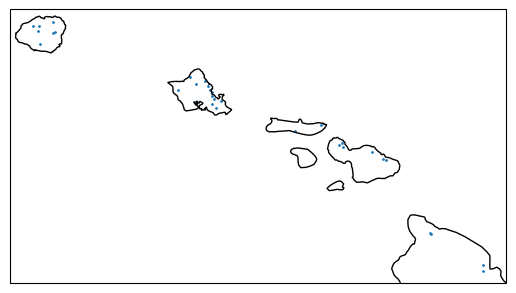

In [19]:
df_available = df_metadata[df_metadata['station_id'].isin(station_ids)]
fig, ax = plt.subplots(1, subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.coastlines()
ax.scatter(df_available['longitude'], df_available['latitude'], s=1)

# ERA5 extraction

In [ ]:
# def process_year(year):
#     filename = f"{base_dir}/preprocessed_data/hourly_ERA5/ERA5_{year}.nc"
#     if os.path.exists(filename): return
    
#     ds = xr.open_dataset(f"{base_dir}/raw_data/ERA5_1974_2025_hourly_pr.nc", decode_timedelta=True) 
#     ds = ds.drop_duplicates('time').drop_vars(['number', 'valid_time', 'surface'])
#     # ds = ds.sel(latitude=hawaii_lat_bound, longitude=hawaii_lon_bound)

#     year_ds = ds.sel(time=slice(f'{year-1}-12-31 12:00:00', f'{year+1}-01-01 12:00:00'))# give buffer
#     all_times = np.concatenate([(t + year_ds.step.values) for t in year_ds.time.values])

#     lat, lon = ds.latitude, ds.longitude
#     # Create an empty dataset with matching vars
#     template = xr.Dataset(
#         {
#             var: (("time", "latitude", "longitude"),
#                 np.full((len(all_times), len(lat), len(lon)), np.nan, dtype=ds[var].dtype))
#             for var in ds.data_vars
#         },
#         coords={"time": all_times, "latitude": lat, "longitude": lon}
#     ).sel(time=slice(f"{year}-01-01 00:00", f"{year}-12-31 23:00")) # filter out the buffer

#     template.to_netcdf(filename, mode='w')

#     root = nc.Dataset(filename, mode="r+")

#     for t in year_ds.time.values:
#         sub = ds.sel(time=t)
#         sub_time = t + sub.step
#         sub = sub.assign_coords(time=sub_time).swap_dims({"step": "time"}).drop_vars("step")

#         # Find the matching indices in the full timeline
#         idx = np.searchsorted(template.time, sub.time.values)
#         for var in ds.data_vars:
#             root[var][idx, :, :] = sub[var].values
#     root.close()

In [57]:
ds

<xarray.Dataset> Size: 35GB
Dimensions:    (time: 37807, step: 12, latitude: 161, longitude: 121)
Coordinates:
  * time       (time) datetime64[ns] 302kB 1973-12-31T18:00:00 ... 2025-10-02...
  * step       (step) timedelta64[ns] 96B 01:00:00 02:00:00 ... 12:00:00
  * latitude   (latitude) float64 1kB 35.0 34.75 34.5 34.25 ... -4.5 -4.75 -5.0
  * longitude  (longitude) float64 968B -171.0 -170.8 -170.5 ... -141.2 -141.0
Data variables:
    tp         (time, step, latitude, longitude) float32 35GB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-10-08T22:00 GRIB to CDM+CF via cfgrib-0.9.1...

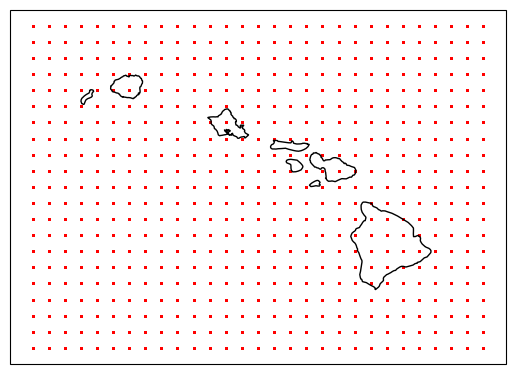

In [19]:
training_period = slice('2007-12-31', '2025-01-01') # give some slack for timezone
lons, lats = np.meshgrid(ds.longitude, ds.latitude)
hawaii_lons, hawaii_lats = np.meshgrid(lons, lats)
fig, ax = plt.subplots(1, subplot_kw=dict(projection=ccrs.PlateCarree()))
# ax.scatter(lons, lats, s=1)
ax.scatter(hawaii_lons, hawaii_lats, s=1, c='r')
ax.coastlines()

In [5]:
xr.open_dataset(f"{base_dir}/raw_data/GFDL/GFDL_CM4C192_pr_hawaii_2007_2014.nc")

<xarray.Dataset> Size: 718MB
Dimensions:  (lat: 80, lon: 48, time: 23376)
Coordinates:
  * lat      (lat) float64 640B -4.75 -4.25 -3.75 -3.25 ... 33.75 34.25 34.75
  * lon      (lon) float64 384B 189.1 189.7 190.3 190.9 ... 217.2 217.8 218.4
  * time     (time) object 187kB 2007-01-01 01:30:00 ... 2014-12-31 22:30:00
Data variables:
    pr       (time, lat, lon) float64 718MB ...